In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"theksg9","key":"5783530dd4c30706555b3c3f51310057"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d noulam/tomato

 99% 733M/743M [00:32<00:00, 21.2MB/s]
100% 743M/743M [00:32<00:00, 23.8MB/s]


In [ ]:
from zipfile import ZipFile
file_name="/content/tomato.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale = 1./255,
        zoom_range=[0.6,0.8],
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest'
        )
train_set=train_datagen.flow_from_directory(
    '/content/New Plant Diseases Dataset(Augmented)/train',
    target_size=(64,64),
    batch_size=16,
    class_mode='categorical'
)

Found 18345 images belonging to 10 classes.


In [ ]:
test_datagen=ImageDataGenerator(rescale=1./255)

test_set=test_datagen.flow_from_directory(
    '/content/New Plant Diseases Dataset(Augmented)/valid',
    batch_size=4,
    target_size=(64,64),
    class_mode='categorical'
)

Found 4585 images belonging to 10 classes.


In [ ]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
classifier=Sequential()
classifier.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3)))
classifier.add(MaxPooling2D())
classifier.add(Convolution2D(32,(3,3),activation='relu'))
classifier.add(MaxPooling2D())
classifier.add(Convolution2D(16,(3,3),activation='relu'))
classifier.add(MaxPooling2D())
classifier.add(Flatten())
classifier.add(Dense(1024,activation='relu'))
classifier.add(Dropout(0.2))
classifier.add(Dense(512,activation='relu'))
classifier.add(Dropout(0.2))
classifier.add(Dense(256,activation='relu'))
classifier.add(Dropout(0.2))
classifier.add(Dense(10,activation='softmax'))

classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
 import tensorflow as tf
 ACCURACY_THRESHOLD=0.95
 class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('val_accuracy') > ACCURACY_THRESHOLD and logs.get('accuracy') > ACCURACY_THRESHOLD):   
          print("\nReached %2.2f%% accuracy, so stopping training!!" %(ACCURACY_THRESHOLD*100))   
          self.model.stop_training = True

callbacks = myCallback()

In [ ]:
classifications=classifier.fit_generator(
    train_set,
    steps_per_epoch=18345/16,
    epochs=40,
    validation_data=test_set,
    validation_steps=4585/4,
    callbacks=[callbacks],
    verbose=2
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/40


In [ ]:
classifier.save('/content/drive/MyDrive/models/tomatoNew.h5')

In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/models/tomato.h5')

In [ ]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(256,256))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  images=images/255.0
  classes = classifier.predict(images, batch_size=10)
  
  print(classes[0])
  print(classes)
  ar=np.array(classes[0]).tolist()
  max_value = max(ar)
  max_index = ar.index(max_value)
  
  if max_index==0 :
    print("Bacterial Spot")
  elif max_index==1 :
    print("Early Blight")
  elif max_index==2 :
    print("Late Blight")
  elif max_index==3 :
    print("Leaf Mold")
  elif max_index==4 :
    print("Septoria Spot")
  elif max_index==5 :
    print("Spider Mites")
  elif max_index==6 :
    print("Target Spot")
  elif max_index==7 :
    print("Yellow Leaf Curles")
  elif max_index==8 :
    print("Mosaic Virus")
  else :
    print("Healthy")
  img=image.load_img(path, target_size=(128,128))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  images=images/255.0
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  print(classes)
  ar=np.array(classes[0]).tolist()
  max_value = max(ar)
  max_index = ar.index(max_value)
  
  if max_index==0 :
    print("Bacterial Spot")
  elif max_index==1 :
    print("Early Blight")
  elif max_index==2 :
    print("Late Blight")
  elif max_index==3 :
    print("Leaf Mold")
  elif max_index==4 :
    print("Septoria Spot")
  elif max_index==5 :
    print("Spider Mites")
  elif max_index==6 :
    print("Target Spot")
  elif max_index==7 :
    print("Yellow Leaf Curles")
  elif max_index==8 :
    print("Mosaic Virus")
  else :
    print("Healthy")

Saving mosaic-virus-on-squash.jfif to mosaic-virus-on-squash.jfif
[1.5002921e-10 1.2063089e-02 6.4354640e-01 1.6150880e-06 3.4436736e-01
 7.5994098e-12 2.3430578e-06 1.3257430e-08 8.0306614e-07 1.8407569e-05]
[[1.5002921e-10 1.2063089e-02 6.4354640e-01 1.6150880e-06 3.4436736e-01
  7.5994098e-12 2.3430578e-06 1.3257430e-08 8.0306614e-07 1.8407569e-05]]
Late Blight
[2.1444373e-08 1.1164395e-04 5.6354386e-01 9.1269449e-08 4.3633971e-01
 1.7374265e-12 4.6495556e-06 1.7543901e-08 1.9191444e-11 4.9552021e-08]
[[2.1444373e-08 1.1164395e-04 5.6354386e-01 9.1269449e-08 4.3633971e-01
  1.7374265e-12 4.6495556e-06 1.7543901e-08 1.9191444e-11 4.9552021e-08]]
Late Blight


In [ ]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
import tensorflow as tf
from tensorflow.keras.applications import ResNet50

In [ ]:
base_model = Sequential()
temp=ResNet50(input_shape=(64, 64,3),include_top=False, weights='imagenet', pooling='max')


In [ ]:
temp.trainable=False

In [ ]:
base_model.add(ResNet50(input_shape=(64, 64,3),include_top=False, weights='imagenet', pooling='max'))
base_model.add(Dense(10, activation='softmax'))

In [ ]:
from tensorflow.keras.optimizers import RMSprop
base_model.compile(optimizer=RMSprop(lr=0.00001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
classifications=base_model.fit_generator(
    train_set,
    steps_per_epoch=18345/16,
    epochs=50,
    validation_data=test_set,
    validation_steps=4585/4,
    
    verbose=2
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
1146/1146 - 267s - loss: 0.0446 - accuracy: 0.9850 - val_loss: 0.4967 - val_accuracy: 0.8879
Epoch 2/50
1146/1146 - 210s - loss: 0.0380 - accuracy: 0.9879 - val_loss: 0.5172 - val_accuracy: 0.8818
Epoch 3/50
1146/1146 - 211s - loss: 0.0372 - accuracy: 0.9874 - val_loss: 0.6715 - val_accuracy: 0.8606
Epoch 4/50


KeyboardInterrupt: ignored

In [ ]:
base_model.save("/content/drive/MyDrive/models/tomatoResnetTL.h5")

Text(0.5, 1.0, 'Training and validation loss')

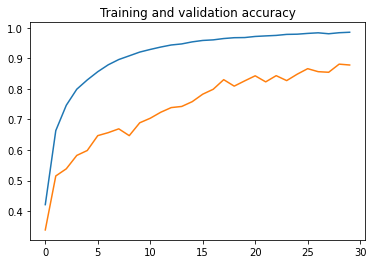

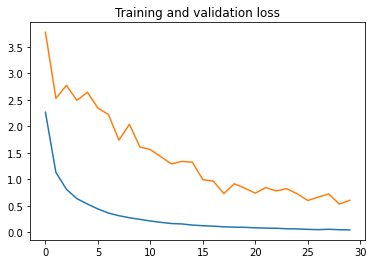

In [ ]:
import matplotlib.pyplot as plt
acc      = classifications.history[     'accuracy' ]
val_acc  = classifications.history[ 'val_accuracy' ]
loss     = classifications.history[    'loss' ]
val_loss = classifications.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )